# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000 
#monthly income variable created
#monthly income set to: 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19031775,
            "id": 1,
            "last_updated": 1651791858,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 691397133391,
                    "percent_change_1h": -0.59380753896147,
                    "percent_change_24h": -8.54588823744436,
                    "percent_change_7d": -7.40966411033213,
                    "percentage_change_1h": -0.59380753896147,
                    "percentage_change_24h": -8.54588823744436,
                    "percentage_change_7d": -7.40966411033213,
                    "price": 36331.0,
                    "volume_24h": 36782479555
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19031775,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120661271,
            "id": 1027,
            "last_updated": 1651791754,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 330665290336,
                    "percent_change_1h": -0.207406296449096,
                    "percent_change_24h": -6.39461639501783,
                    "percent_change_7d": -5.15490286747265,
                    "percentage_change_1h": -0.207406296449096,
                    "percentage_change_24h": -6.39461639501783,
                    "percentage_change_7d": -5.15490286747265,
                    "price": 2740.64,
                    "volume_24h": 20603669434
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120661271,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f"The price for Bitcoin is currently:${btc_price}")

The price for Bitcoin is currently:$36331.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE
print(f"The price for Etherium is currently:${eth_price}")

The price for Etherium is currently:$2740.64


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f"The value of your Bitcoin is currently:${btc_value}")

The value of your Bitcoin is currently:$43597.2


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
print(f"The value of your Etherium is currently:${eth_value}")

The value of your Etherium is currently:$14525.391999999998


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total value of your crytocurrency assets are currently:${total_crypto_wallet}")

The total value of your crytocurrency assets are currently:$58122.592


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY", "AGG"]
# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2022-04-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-29", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the Ticker DataFrames
df_portfolio = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
df_portfolio

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-04-25 04:00:00+00:00  423.70  428.69  418.84  428.51  119103454   
2022-04-26 04:00:00+00:00  425.92  426.04  416.07  416.10  101074178   
2022-04-27 04:00:00+00:00  417.38  422.92  415.01  417.20  120771109   
2022-04-28 04:00:00+00:00  422.17  429.64  417.60  427.81  104665724   
2022-04-29 04:00:00+00:00  423.56  425.87  411.21  412.00  145242451   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-04-25 04:00:00+00:00     1139830  423.952513  103.47  103.93  103.470   
2022-04-26 04:00:00+00:00     1001090  420.127020  104.13  104.13  103.800   
2022-04-27 04:00:00+00:00     1005154  418.848698  103.94  104.01  103.530   
2022-04-28 04:00:00+00:00      801719  424.039318  103.33  103.51  103.165   
2022-04-29 04:00:00+00:00     1143618  416.879474  102.92  103.27  102.820   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-25 04:00:00+00:00  103.63   8768318       31373  103.691097  
2022-04-26 04:00:00+00:00  103.95   8533802       30915  103.960003  
2022-04-27 04:00:00+00:00  103.53  11102819       39392  103.679752  
2022-04-28 04:00:00+00:00  103.49   9901783       32976  103.361421  
2022-04-29 04:00:00+00:00  102.87   9922012       33928  103.003420

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
final_date_index = 4

agg_close_price = df_portfolio.iloc[final_date_index][("AGG","close")]
# Print the AGG closing price
# YOUR CODE HERE
display(agg_close_price)

102.87

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio.iloc[final_date_index][("SPY","close")]

# Print the SPY closing price
# YOUR CODE HERE
display(spy_close_price)

412.0

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE
display(agg_value)

20574.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE
display(spy_value)

45320.0

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
display(total_stocks_bonds)

65894.0

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
display(total_portfolio)

124016.592

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_stocks_bonds,total_crypto_wallet]
# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[65894.0, 58122.592]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(data = savings_data, columns = ["Amount"], index = ["Crypto","Stock/Bond"])

savings_df

,Amount
Crypto,65894.000
Stock/Bond,58122.592


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

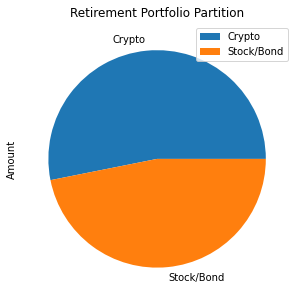

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE

#df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                  # 'radius': [2439.7, 6051.8, 6378.1]},
                  #index=['Mercury', 'Venus', 'Earth'])
plot = savings_df.plot.pie(y='Amount', figsize=(5, 5), title="Retirement Portfolio Partition")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = 12000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
if total_portfolio > emergency_fund_value:
    print(f"Congratulations! You're future is secured!")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations, you've saved $ {emergency_fund_value}, that's quite an accomplishmenet! Good job reaching this financial milestone!")
else: 
    print(f"Almost there! You are ${emergency_fund_value - total_portfolio} away from your goal! ")


Congratulations! You're future is secured!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-05-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-05-05", tz="America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
df_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY = df_prices[df_prices['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_prices[df_prices['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
df_prices = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(df_prices.head())
display(df_prices.tail())

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2019-05-06 04:00:00+00:00  108.56  108.57  108.440  108.48  4609533   
2019-05-07 04:00:00+00:00  108.63  108.70  108.585  108.61  3051352   
2019-05-08 04:00:00+00:00  108.74  108.81  108.550  108.59  5946447   
2019-05-09 04:00:00+00:00  108.78  108.81  108.550  108.65  4847612   
2019-05-10 04:00:00+00:00  108.74  108.82  108.630  108.67  5257517   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-05-06 04:00:00+00:00        9832  108.483950  289.24  293.31  288.90   
2019-05-07 04:00:00+00:00       11537  108.645473  290.15  290.81  285.81   
2019-05-08 04:00:00+00:00       23765  108.696775  287.56  289.43  286.87   
2019-05-09 04:00:00+00:00       24245  108.690783  285.20  287.33  283.30   
2019-05-10 04:00:00+00:00       19380  108.714251  285.64  288.94  282.30   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2019-05-06 04:00:00+00:00  292.82  107250892      390959  291.952803  
2019-05-07 04:00:00+00:00  287.93  145292657      618594  288.280747  
2019-05-08 04:00:00+00:00  287.53   91714817      455857  288.141309  
2019-05-09 04:00:00+00:00  286.66  103471271      526341  285.580572  
2019-05-10 04:00:00+00:00  288.10  112603342      602402  285.828611

AGG                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-04-29 04:00:00+00:00  102.92  103.27  102.820  102.87   9922012   
2022-05-02 04:00:00+00:00  102.35  102.36  102.000  102.13  12701609   
2022-05-03 04:00:00+00:00  102.71  102.79  102.290  102.36  12148512   
2022-05-04 04:00:00+00:00  102.32  103.05  102.120  103.02  14342690   
2022-05-05 04:00:00+00:00  102.37  102.52  101.585  102.00  17491639   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-04-29 04:00:00+00:00       33928  103.003420  423.56  425.87  411.2100   
2022-05-02 04:00:00+00:00       39900  102.151602  412.01  415.92  405.0200   
2022-05-03 04:00:00+00:00       46402  102.520626  414.91  418.93  413.3600   
2022-05-04 04:00:00+00:00       52717  102.525746  417.13  429.66  413.7099   
2022-05-05 04:00:00+00:00       43726  101.866927  424.58  425.00  409.4400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-04-29 04:00:00+00:00  412.00  145242451     1143618  416.879474  
2022-05-02 04:00:00+00:00  414.48  157684938     1459109  411.158285  
2022-05-03 04:00:00+00:00  416.38   99739343      849671  416.097976  
2022-05-04 04:00:00+00:00  429.06  143203740     1455621  421.265866  
2022-05-05 04:00:00+00:00  413.81  171990054     1577364  415.443183

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_thirty_year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*30
)

# Review the simulation input data
# YOUR CODE HERE
MC_thirty_year.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2019-05-06 04:00:00+00:00  108.56  108.57  108.440  108.48  4609533   
2019-05-07 04:00:00+00:00  108.63  108.70  108.585  108.61  3051352   
2019-05-08 04:00:00+00:00  108.74  108.81  108.550  108.59  5946447   
2019-05-09 04:00:00+00:00  108.78  108.81  108.550  108.65  4847612   
2019-05-10 04:00:00+00:00  108.74  108.82  108.630  108.67  5257517   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-06 04:00:00+00:00        9832  108.483950          NaN  289.24   
2019-05-07 04:00:00+00:00       11537  108.645473     0.001198  290.15   
2019-05-08 04:00:00+00:00       23765  108.696775    -0.000184  287.56   
2019-05-09 04:00:00+00:00       24245  108.690783     0.000553  285.20   
2019-05-10 04:00:00+00:00       19380  108.714251     0.000184  285.64   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2019-05-06 04:00:00+00:00  293.31  288.90  292.82  107250892      390959   
2019-05-07 04:00:00+00:00  290.81  285.81  287.93  145292657      618594   
2019-05-08 04:00:00+00:00  289.43  286.87  287.53   91714817      455857   
2019-05-09 04:00:00+00:00  287.33  283.30  286.66  103471271      526341   
2019-05-10 04:00:00+00:00  288.94  282.30  288.10  112603342      602402   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-06 04:00:00+00:00  291.952803          NaN  
2019-05-07 04:00:00+00:00  288.280747    -0.016700  
2019-05-08 04:00:00+00:00  288.141309    -0.001389  
2019-05-09 04:00:00+00:00  285.580572    -0.003026  
2019-05-10 04:00:00+00:00  285.828611     0.005023

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/danielcha/Desktop/Github_Upload/challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997282,0.996427,1.009989,1.004547,0.984249,0.992940,0.995876,0.997124,0.998630,0.999692,...,1.004075,0.997687,0.996581,0.996696,0.997752,1.001354,1.001076,1.001290,1.007179,1.002540
2,0.996846,1.002138,1.017244,1.006168,0.996631,0.985277,0.998787,0.998891,0.995563,1.003930,...,1.005257,1.001579,0.989976,0.990907,1.004732,1.005672,0.995288,1.001991,1.004628,1.004023
3,0.998962,1.002286,1.012137,1.010594,0.999278,0.982383,0.996078,0.999774,1.002112,1.000910,...,1.002385,0.999825,0.999511,0.993966,1.001684,1.009310,0.993390,0.996029,1.006388,1.012321
4,0.999604,0.998901,1.011599,1.013137,1.010599,0.984658,0.987181,0.997254,0.999392,1.003161,...,0.998436,1.008061,0.999764,0.994844,0.999366,1.018113,0.992609,0.990240,1.002356,1.011851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.266329,2.587311,2.455878,2.579687,5.993265,4.373828,3.858095,3.930879,2.193485,4.399568,...,2.520045,2.290557,2.215698,4.174903,7.119602,4.760437,6.190825,2.054818,2.036701,5.003570
7557,3.269913,2.586215,2.469672,2.578895,5.976275,4.377243,3.859502,3.963608,2.174454,4.438089,...,2.528156,2.300736,2.212993,4.139236,7.153422,4.778870,6.245518,2.042756,2.030377,4.965383
7558,3.283111,2.589153,2.467496,2.560724,5.986962,4.377781,3.920069,3.963807,2.171877,4.429509,...,2.513177,2.283196,2.197919,4.140850,7.113864,4.747872,6.245934,2.050023,2.017692,4.919645
7559,3.273499,2.595114,2.457841,2.574370,5.991755,4.404923,3.898123,3.962461,2.179565,4.423820,...,2.511488,2.271659,2.198236,4.156766,7.043733,4.778939,6.235167,2.045679,2.015785,4.904329


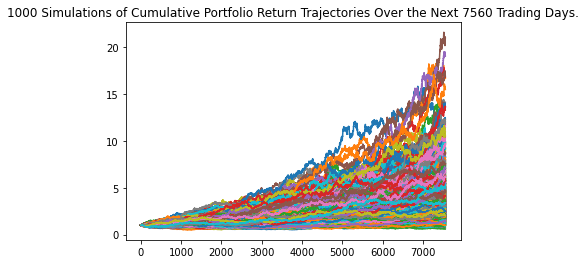

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_thirty_year_line_plot = MC_thirty_year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

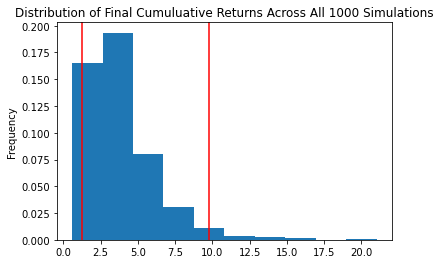

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_thirty_dist_plot = MC_thirty_year.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_thirty_year_table = MC_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
print(MC_thirty_year_table)

count           1000.000000
mean               3.893460
std                2.381919
min                0.595992
25%                2.312067
50%                3.261537
75%                4.776165
max               21.012388
95% CI Lower       1.241276
95% CI Upper       9.801284
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"Stock/Bond Balance: ${total_stocks_bonds}")

Stock/Bond Balance: $65894.0


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_thirty_year_table[8] * total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_thirty_year_table[9] * total_stocks_bonds,2)

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in a portfolio"
      f" with a 40% AGG allocation and a 60% SPY allocation over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of $65894.0 in a portfolio with a 40% AGG allocation and a 60% SPY allocation over the next 30 years will end within in the range of $81792.66 and $645845.81.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_ten_year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
# YOUR CODE HERE
MC_ten_year.portfolio_data.head()


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2019-05-06 04:00:00+00:00  108.56  108.57  108.440  108.48  4609533   
2019-05-07 04:00:00+00:00  108.63  108.70  108.585  108.61  3051352   
2019-05-08 04:00:00+00:00  108.74  108.81  108.550  108.59  5946447   
2019-05-09 04:00:00+00:00  108.78  108.81  108.550  108.65  4847612   
2019-05-10 04:00:00+00:00  108.74  108.82  108.630  108.67  5257517   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-05-06 04:00:00+00:00        9832  108.483950          NaN  289.24   
2019-05-07 04:00:00+00:00       11537  108.645473     0.001198  290.15   
2019-05-08 04:00:00+00:00       23765  108.696775    -0.000184  287.56   
2019-05-09 04:00:00+00:00       24245  108.690783     0.000553  285.20   
2019-05-10 04:00:00+00:00       19380  108.714251     0.000184  285.64   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2019-05-06 04:00:00+00:00  293.31  288.90  292.82  107250892      390959   
2019-05-07 04:00:00+00:00  290.81  285.81  287.93  145292657      618594   
2019-05-08 04:00:00+00:00  289.43  286.87  287.53   91714817      455857   
2019-05-09 04:00:00+00:00  287.33  283.30  286.66  103471271      526341   
2019-05-10 04:00:00+00:00  288.94  282.30  288.10  112603342      602402   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-05-06 04:00:00+00:00  291.952803          NaN  
2019-05-07 04:00:00+00:00  288.280747    -0.016700  
2019-05-08 04:00:00+00:00  288.141309    -0.001389  
2019-05-09 04:00:00+00:00  285.580572    -0.003026  
2019-05-10 04:00:00+00:00  285.828611     0.005023

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/danielcha/Desktop/Github_Upload/challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007756,1.001035,1.000145,0.996772,1.000430,1.007945,0.992272,0.993438,1.022941,1.014991,...,1.007249,0.986340,0.979028,1.003653,0.995706,1.000380,1.002258,1.000867,1.017460,0.987383
2,0.984918,0.994234,1.004230,0.985686,1.002349,1.012013,0.992894,0.994297,1.033404,1.019740,...,1.016265,0.987435,0.972840,1.003392,0.984657,0.985178,0.992868,1.000967,1.004072,0.996646
3,0.986830,0.998078,1.014624,0.978441,0.985768,1.023748,0.994281,0.973458,1.024701,1.022711,...,0.989285,1.009605,0.961729,1.005988,0.981000,0.983236,1.005446,1.001017,1.014164,1.023022
4,0.989800,1.001684,1.006284,0.976793,0.983941,1.024922,1.000434,0.965239,1.017216,1.017465,...,1.003452,1.011600,0.986205,1.012258,0.973653,0.971231,1.013375,1.006117,1.038150,1.024416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.959143,2.315181,2.685355,3.637999,2.121910,3.926658,7.490224,2.699702,3.900097,1.035338,...,1.882702,2.744338,1.486750,2.535990,4.664165,2.377913,2.413691,1.401858,6.029011,1.711400
2517,2.942443,2.276561,2.707096,3.623925,2.177531,3.894782,7.507834,2.721175,3.871651,1.019402,...,1.930313,2.703587,1.486952,2.520971,4.642432,2.400500,2.408050,1.385009,6.059411,1.736020
2518,2.951114,2.251836,2.712090,3.680630,2.181078,3.876991,7.521392,2.630013,3.902614,1.042234,...,1.949676,2.721851,1.463683,2.546796,4.655993,2.413746,2.440882,1.404623,6.076170,1.747142
2519,2.981764,2.259701,2.735092,3.664998,2.182944,3.930675,7.497177,2.591729,3.917908,1.050887,...,1.921970,2.712747,1.444809,2.508513,4.719139,2.454240,2.480626,1.390684,6.134539,1.723983


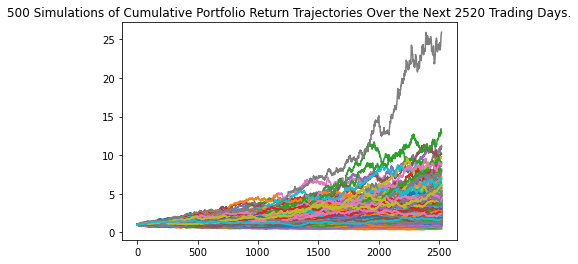

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_ten_year_line_plot = MC_ten_year.plot_simulation()

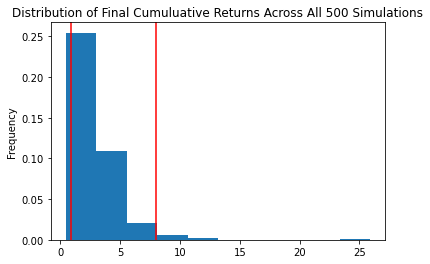

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_ten_year_dist_plot = MC_ten_year.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_ten_year_table = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
print(MC_ten_year_table)

count           500.000000
mean              2.914080
std               2.046480
min               0.443420
25%               1.642709
50%               2.442419
75%               3.447237
max              25.902432
95% CI Lower      0.898213
95% CI Upper      7.954548
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"Stock/Bond Balance: ${total_stocks_bonds}")

Stock/Bond Balance: $65894.0


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_ten_year_table[8] * total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_ten_year_table[9] * total_stocks_bonds,2)

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in a portfolio"
      f" with a 20% AGG allocation and a 80% SPY allocation over the next 10 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of $65894.0 in a portfolio with a 20% AGG allocation and a 80% SPY allocation over the next 10 years will end within in the range of $59186.88 and $524156.98.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [ ]:
It would certainly appear so! 